In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

grado = int(input("Ingrese el grado del polinomio"))
def GetNewtonMethod(f,df,xn,itmax = 100000, precision=1e-6):
    
    error = 1.
    it = 0
    
    while error > precision and it < itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(xn)
            
            error = np.abs(f(xn)/df(xn))
        
        except ZeroDivisionError:
            print("zero division")
            
        xn  = xn1
        it += 1
    

    
    if it == itmax:
        return False
    else:
        return xn
    
    
def GetAllRoots(f,df,x, tolerancia=9):
    
    Roots = np.array([])
    
    for i in x:
        
        root = GetNewtonMethod(f,df,i)
          
        if root != False:
            
            croot = np.round( root, tolerancia ) 
            
            if croot not in Roots:
                Roots = np.append( Roots, croot )
                

    Roots.sort()
    
    return Roots
def GetLegendre(n):
    
    x = sym.Symbol('x',Real=True)
    y = sym.Symbol('y',Real=True)
    
    y = (x**2 - 1)**n
    
    p = sym.diff(y,x,n)/(2**n * np.math.factorial(n))
    
    return p
Legendre = []
DerLegendre = []

x = sym.Symbol('x',Real=True)
n=20

for i in range(n+1):
    
    poly = GetLegendre(i)
    
    Legendre.append(poly)
    DerLegendre.append(sym.diff(poly,x,1))

def GetRootsPolynomial(n,xi,poly,dpoly):
    
    x = sym.Symbol('x',Real=True)
    
    pn = sym.lambdify([x],poly[n],'numpy')
    dpn = sym.lambdify([x],dpoly[n],'numpy')
    Roots = GetAllRoots(pn,dpn,xi,tolerancia=8)
    
    return Roots
xi = np.linspace(-1,1,100)
Roots = GetRootsPolynomial(grado,xi,Legendre,DerLegendre)
print(Roots)

Ingrese el grado del polinomio2
[-0.57735027  0.57735027]


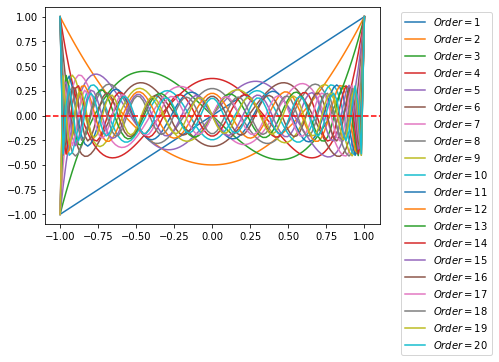

In [3]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

t = np.linspace(-1,1,100)
x = sym.Symbol('x',Real=True)

for i in range(1,n+1):
    pn = sym.lambdify([x],Legendre[i],'numpy')
    ax.plot(t,pn(t),label=r'$Order=%.0f$'%(i))
    
ax.axhline(y=0,ls='--',color='r')

ax.legend()
plt.legend(bbox_to_anchor=(1.05, 1))